## Albina Jetybayeva. DSE511. Project 1.


# Task 3. Compare the countries with different levels of quarantine rules. 

The motivation for this analysis was to compare the countries with different levels of lockdown rules (how strict they are) and see the effect on the covid cases trends.

Consider the cases for each country: New Zealand, South Korea, Germany, Norway, Kazakhstan, Italy, the USA.

To compare the countries and see the effect of strictness level of lockdown and quarantine rules on the number of confirmed cases a few assumptions will be made:

* First, the timeline for comparison will use the date of the first confirmed case in each country: New Zealand [28.02.2020], South Korea [20.01.2020], Germany [27.01.2020], Norway [26.02.2020], Kazakhstan [29.03.2020], Italy [01.02.2020], the USA [20.01.2020] (Referring to the Reference list at the end of the notebook). 
* To see the possible impact of lockdown rules on the virus spread, the number of total confirmed cases will be taken after 3 months from the first cases detected in each country: New Zealand [28.05.2020], South Korea [20.04.2020], Germany [27.04.2020], Norway [26.05.2020], Kazakhstan [29.06.2020], Italy [01.05.2020], the USA [20.04.2020].
* To make a more fair comparison the number of confirmed cases will be divided by the population of each country (this might not be the best way, but at least it will normalize the numbers and will consider the total population).
* Population for each country in 2020: New Zealand [4822233], South Korea [51269185], Germany [83783942], Norway [5421241], Kazakhstan [18776707], Italy [60461826], the USA [331002651] (Referring to the Reference list at the end of the notebook).

In [26]:
#First load the necessary packages:

import numpy as np
import pandas as pd
import folium
import matplotlib as mpl
import matplotlib.pyplot as plt

In [27]:
#Extract data from the file for New Zealand:

data_task3_nz = pd.read_csv('05-28-2020.csv')
#data_task3_nz.head (used it to check data)

In [28]:
#Use Country_Region as index column

data_task3_nz2 = data_task3_nz.set_index("Country_Region", drop = False)

In [29]:
#Get the number of confirmed cases on that day for New Zealand

data_task3_nz3=data_task3_nz2.loc["New Zealand","Confirmed"]
data_task3_nz3

Country_Region
New Zealand    1504
New Zealand       0
Name: Confirmed, dtype: int64

In [30]:
#Some countries have more than 2 numbers, as there is data for regions of a country in one file. So the summmed number is used for them.

data_task3_nz4=data_task3_nz3.sum(axis=0)
print(data_task3_nz4)

1504


In [31]:
#Extract data from the file for South Korea:

data_task3_sk = pd.read_csv('04-20-2020.csv')
#data_task3_sk.head (used it to check data)

In [32]:
#Use Country_Region as index column

data_task3_sk2 = data_task3_sk.set_index("Country_Region", drop = False)

In [33]:
#Get the number of confirmed cases on that day for South Korea

data_task3_sk3=data_task3_sk2.loc["Korea, South","Confirmed"]
data_task3_sk3

10674

In [34]:
#Extract data from the file Germany:

data_task3_ger = pd.read_csv('04-27-2020.csv')
#data_task3_ger.head

In [35]:
#Use Country_Region as index column

data_task3_ger2 = data_task3_ger.set_index("Country_Region", drop = False)

In [36]:
#Get the number of confirmed cases on that day for Germany

data_task3_ger3=data_task3_ger2.loc["Germany","Confirmed"]
data_task3_ger3

158758

In [37]:
#Extract data from the file Norway:

data_task3_nor = pd.read_csv('05-26-2020.csv')
#data_task3_nor.head

In [38]:
#Use Country_Region as index column

data_task3_nor2 = data_task3_nor.set_index("Country_Region", drop = False)

In [39]:
#Get the number of confirmed cases on that day for Norway

data_task3_nor3=data_task3_nor2.loc["Norway","Confirmed"]
data_task3_nor3

8383

In [40]:
#Extract data from the file Kazakhstan:

data_task3_kz = pd.read_csv('06-29-2020.csv')
#data_task3_kz.head

In [41]:
#Use Country_Region as index column

data_task3_kz2 = data_task3_kz.set_index("Country_Region", drop = False)

In [42]:
#Get the number of confirmed cases on that day for Kazakhstan

data_task3_kz3=data_task3_kz2.loc["Kazakhstan","Confirmed"]
data_task3_kz3

21819

In [43]:
#Extract data from the file Italy:

data_task3_ita = pd.read_csv('05-01-2020.csv')
#data_task3_ita.head

In [44]:
#Use Country_Region as index column

data_task3_ita2 = data_task3_ita.set_index("Country_Region", drop = False)

In [45]:
#Get the number of confirmed cases on that day for Italy

data_task3_ita3=data_task3_ita2.loc["Italy","Confirmed"]
data_task3_ita3

207428

## Note

To consider USA case, I used the files from csse covid 19 daily report us: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports_us. Just to have more accurate data.

Korea and USA have the same dates, so I renamed the original file for US "04-20-2020.csv" to "04-20-2020us.csv".

In [46]:
#Extract data from the file USA


data_task3_usa = pd.read_csv('04-20-2020us.csv')
#data_task3_usa.head

In [47]:
#Get the total of confirmed cases for all USA states:

confirmed_sum=data_task3_usa["Confirmed"].sum()
print(confirmed_sum)

784356


In [48]:
#Analyze the extracted data.

#Input population from the reference

pop_nz=4822233
pop_sk=51269185
pop_ger=83783942
pop_nor=5421241
pop_kz=18776707
pop_ita=60461826
pop_usa=331002651

#Calculate confirmed cases per population

nz_conf=data_task3_nz4/pop_nz
sk_conf=data_task3_sk3/pop_sk
ger_conf=data_task3_ger3/pop_ger
nor_conf=data_task3_nor3/pop_nor
kz_conf=data_task3_kz3/pop_kz
ita_conf=data_task3_ita3/pop_ita
usa_conf=confirmed_sum/pop_usa

In [49]:
# Initialize list of lists
data_all = [['New Zealand', nz_conf], ['South Korea', sk_conf], ['Germany', ger_conf], ['Norway', nor_conf], ['Kazakhstan', kz_conf], ['Italy', ita_conf], ['USA', usa_conf]]
 
# Create the pandas DataFrame
data_all1 = pd.DataFrame(data_all, columns = ['Country', 'Confirmed cases per population'])
 
# print dataframe.
data_all1

Country  Confirmed cases per population
0  New Zealand                        0.000312
1  South Korea                        0.000208
2      Germany                        0.001895
3       Norway                        0.001546
4   Kazakhstan                        0.001162
5        Italy                        0.003431
6          USA                        0.002370

Text(0.5, 1.0, 'Comparison of countries with different level of quarantine rules')

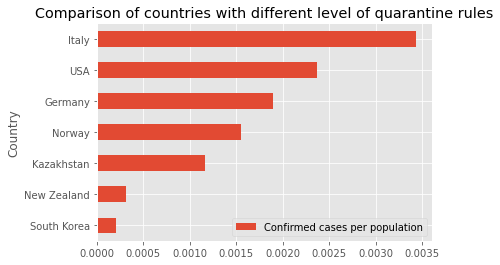

In [50]:
#Plot a bar chart to observe the differences in countries.

mpl.style.use(['ggplot']) #use ggplot style

data_all2 = data_all1.sort_values(by='Confirmed cases per population', ascending=True, inplace=False)
ax=data_all2.plot.barh(y='Confirmed cases per population', x='Country')
ax.set_title('Comparison of countries with different level of quarantine rules')

## Notes

It would be also interesting to see the deaths trends for these countries.

In [51]:
#Get the number of deaths on that day for New Zealand

data_task3_nzd=data_task3_nz2.loc["New Zealand","Deaths"]
data_task3_nzd

Country_Region
New Zealand    22
New Zealand     0
Name: Deaths, dtype: int64

In [52]:
#Sum up the numbers for regions in one country:

data_task3_nzdd=data_task3_nzd.sum(axis=0)
print(data_task3_nzdd)

22


In [53]:
#Get the number of deaths on that day for South Korea

data_task3_skd=data_task3_sk2.loc["Korea, South","Deaths"]
data_task3_skd

236

In [54]:
#Get the number of deaths on that day for Germany

data_task3_gerd=data_task3_ger2.loc["Germany","Deaths"]
data_task3_gerd

6126

In [55]:
#Get the number of deaths on that day for Norway

data_task3_nord=data_task3_nor2.loc["Norway","Deaths"]
data_task3_nord

235

In [56]:
#Get the number of deaths on that day for Kazakhstan

data_task3_kzd=data_task3_kz2.loc["Kazakhstan","Deaths"]
data_task3_kzd

188

In [57]:
#Get the number of deaths on that day for Italy

data_task3_itad=data_task3_ita2.loc["Italy","Deaths"]
data_task3_itad

28236

In [58]:
#Get the number of deaths on that day for USA

data_task3_usd=data_task3_usa["Deaths"].sum()
print(data_task3_usd)

42625


In [59]:
#Analyze the extracted data.
#Calculate deaths per population

nz_deaths=data_task3_nzdd/pop_nz
sk_deaths=data_task3_skd/pop_sk
ger_deaths=data_task3_gerd/pop_ger
nor_deaths=data_task3_nord/pop_nor
kz_deaths=data_task3_kzd/pop_kz
ita_deaths=data_task3_itad/pop_ita
usa_deaths=data_task3_usd/pop_usa

In [60]:
# Initialize list of lists
data_alld = [['New Zealand', nz_deaths], ['South Korea', sk_deaths], ['Germany', ger_deaths], ['Norway', nor_deaths], ['Kazakhstan', kz_deaths], ['Italy', ita_deaths], ['USA', usa_deaths]]
 
# Create the pandas DataFrame
data_alld1 = pd.DataFrame(data_alld, columns = ['Country', 'Deaths per population'])
 
# print dataframe.
data_alld1

Country  Deaths per population
0  New Zealand               0.000005
1  South Korea               0.000005
2      Germany               0.000073
3       Norway               0.000043
4   Kazakhstan               0.000010
5        Italy               0.000467
6          USA               0.000129

Text(0.5, 1.0, 'Comparison of countries with different level of quarantine rules')

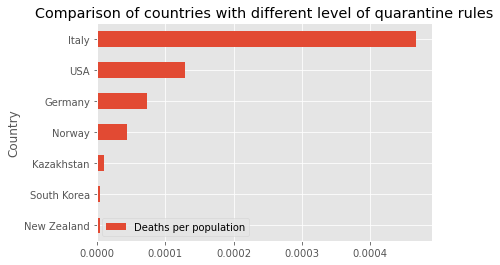

In [61]:
#Plot a bar chart to obsreved the differences in countries.


data_alld2 = data_alld1.sort_values(by='Deaths per population', ascending=True, inplace=False)
axd=data_alld2.plot.barh(y='Deaths per population', x='Country')
axd.set_title('Comparison of countries with different level of quarantine rules')

## Check the current state of the countries

Use mapping to see the recent data for these countries on September 17, 2021. The bubbles size will show case fatality ratio, and each bubble when clicked will demonstrate the name of a country and number of confirmed cases.

In [62]:
#Extract data from the recent date (17 September, 2021)
data_recent = pd.read_csv('09-17-2021.csv')
data_recent1 = data_recent.set_index("Country_Region", drop = False)
data_recent2=data_recent1.loc[['New Zealand', 'Korea, South', 'Germany', 'Norway', 'Kazakhstan', 'Italy', 'US'], ['Lat', 'Long_', 'Confirmed', 'Country_Region', 'Case_Fatality_Ratio']]
data_recent2.dropna(inplace=True) #drop rows with NANs, because they cannot be mapped
print(data_recent2)

                      Lat       Long_  Confirmed Country_Region  \
Country_Region                                                    
New Zealand    -21.236700 -159.777700          1    New Zealand   
New Zealand    -40.900600  174.886000       4038    New Zealand   
Korea, South    35.907757  127.766922     284022   Korea, South   
Germany         48.661600    9.350100     556171        Germany   
Germany         48.790400   11.497900     708285        Germany   
...                   ...         ...        ...            ...   
US              41.659439 -108.882788       6398             US   
US              43.935225 -110.589080       4743             US   
US              41.287818 -110.547578       3326             US   
US              43.904516 -107.680187       1173             US   
US              43.839612 -104.567488        854             US   

                Case_Fatality_Ratio  
Country_Region                       
New Zealand                0.000000  
New Zealand   

In [63]:
# Create map and display it using Folium:

world_map = folium.Map(location=[30, 0], zoom_start=1.5,tiles='Stamen Toner')
for lat, lon, value, name,fatal_ratio in zip(data_recent2['Lat'], data_recent2['Long_'], data_recent2['Confirmed'], data_recent2['Country_Region'], data_recent2['Case_Fatality_Ratio']):
    folium.CircleMarker([lat, lon],
                        radius=fatal_ratio,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases</strong>: ' + str(value) + '<br>'),
                        color='rgb(102, 102, 255)',
                        
                        fill_color='rgb(102, 102, 255)',
                        fill_opacity=0.7 ).add_to(world_map)
world_map

# Summary

* As it was expected, such countries as New Zealand and South Korea, with very strict lockdown and quarantine rules had the lowest confirmed cases and death per population. These countries closed the borders and imposed very harsh quarantine rules (2 weeks of total isolation in a special accommodation approved by the government with location tracking mobile apps).
* Norway and Germany have been also quite stricter compared to other countries. They limited all non-essential travels and closed borders for several countries with a large spread of covid. For example, Norway restricted American travelers to enter the country.
* Kazakhstan shows a medium number of cases and death per population. However, the rules and lockdown have not been strict in this country, compared to New Zealand and Korea. So this might be attributed to other factors as the low density of population (7 people per km2), Korea (527 people per km2), where all the cities are quite widespread in the country and that might hinder the wide spread of the virus. There are might be other factors like unreliable data collection and others.
* The cases of Italy and the USA show that less strict rules of lockdown and quarantine compared to New Zealand for example, or later implementation of strict rules could result in higher cases and death per population. Italy specifically suffered a large cases spike due to many covid cases clusters formations within a short period of time.
* Again similar trend and high correlation between cases and deaths were observed from bar charts.
* The map shows that among the studied countries the USA was hit hardest by Covid so far.

## Reference

https://en.wikipedia.org/wiki/COVID-19_pandemic_in_New_Zealand#:~:text=The%20first%20case%20of%20the,3%2C658%20confirmed%20and%20356%20probable

https://www.worldometers.info/world-population/new-zealand-population/

https://www.csis.org/analysis/timeline-south-koreas-response-covid-19

https://en.wikipedia.org/wiki/COVID-19_pandemic_in_South_Korea

https://www.worldometers.info/world-population/south-korea-population/

https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Germany#:~:text=The%20COVID%2D19%20pandemic%20in,was%20confirmed%20near%20Munich%2C%20Bavaria

https://www.worldometers.info/world-population/germany-population/

https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Kazakhstan

https://www.worldometers.info/world-population/kazakhstan-population/

https://en.wikipedia.org/wiki/COVID-19_pandemic_in_the_United_States

https://www.worldometers.info/world-population/us-population/

https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Italy

https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Norway

https://www.worldometers.info/world-population/norway-population/

https://www.fodors.com/news/photos/these-9-countries-have-the-strictest-covid-restrictions-for-travelers

https://python-visualization.github.io/folium/modules.html

https://www.kaggle.com/parulpandey/wuhan-coronavirus-a-geographical-analysis/data

https://www.kaggle.com/arpandas65/covid-19-regional-and-time-series-data-analysis
